<a href="https://colab.research.google.com/github/benjaminsw/Generalised_Linear_Models/blob/main/R_achievement_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
if (!require('gsheet')) install.packages('gsheet'); library('gsheet')

Loading required package: gsheet

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘gsheet’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Read in achievement score data
url <- 'https://docs.google.com/spreadsheets/d/1lpnKuvEkwVcLXUnT-NwfaeCDKtHLt3jvg4PMFJvQv10/edit?usp=sharing'
dat <- gsheet2tbl(url)
#dat <- read.csv("achievement.csv")
head(dat)

method,y,x
<chr>,<dbl>,<dbl>
A,6,3
A,4,1
A,5,3
A,3,1
A,4,2
A,3,1


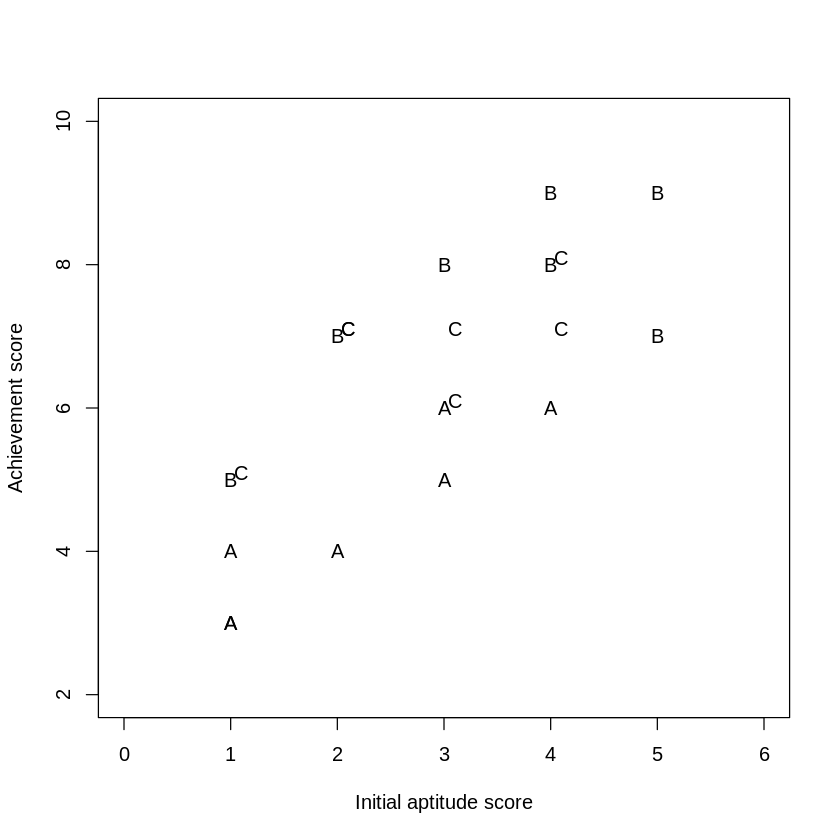

In [3]:
# Scatterplot
plot(dat$x[dat$method=="A"], dat$y[dat$method=="A"], xlab="Initial aptitude score", 
    ylab="Achievement score", pch="A", xlim=c(min(dat$x)-1, max(dat$x)+1),
    ylim=c(min(dat$y)-1, max(dat$y)+1))
points(dat$x[dat$method=="B"], dat$y[dat$method=="B"], pch="B")
points(dat$x[dat$method=="C"]+0.1, dat$y[dat$method=="C"]+0.1, pch="C")

In [4]:
# Fit the models
m1 <- lm(y~ method+x, data=dat)
summary(m1)
anova(m1)


Call:
lm(formula = y ~ method + x, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.73878 -0.57959  0.07347  0.48980  1.00408 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.8367     0.4235   6.699 3.74e-06 ***
methodB       2.1878     0.4545   4.814 0.000162 ***
methodC       1.8612     0.4240   4.390 0.000400 ***
x             0.7429     0.1421   5.227 6.84e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7785 on 17 degrees of freedom
Multiple R-squared:  0.8386,	Adjusted R-squared:  0.8101 
F-statistic: 29.43 on 3 and 17 DF,  p-value: 5.889e-07


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
method,2,36.95238,18.4761905,30.48864,2.382796e-06
x,1,16.55510,16.5551020,27.31854,6.837988e-05
Residuals,17,10.30204,0.6060024,NA,NA


In [5]:
m2 <- lm(y~ x, data=dat)
summary(m2)


Call:
lm(formula = y ~ x, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5000 -1.4574  0.5000  0.5425  1.5319 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.4468     0.6112   5.639 1.95e-05 ***
x             1.0106     0.2001   5.051 7.09e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.197 on 19 degrees of freedom
Multiple R-squared:  0.5732,	Adjusted R-squared:  0.5507 
F-statistic: 25.52 on 1 and 19 DF,  p-value: 7.088e-05


In [6]:
anova(m2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,36.57548,36.575481,25.51711,7.088061e-05
Residuals,19,27.23404,1.433371,NA,NA


In [7]:
# Compare models using an F-test:
anova(m2,m1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,19,27.23404,NA,NA,NA,NA
2,17,10.30204,2,16.932,13.97024,0.0002578664
